      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0     39

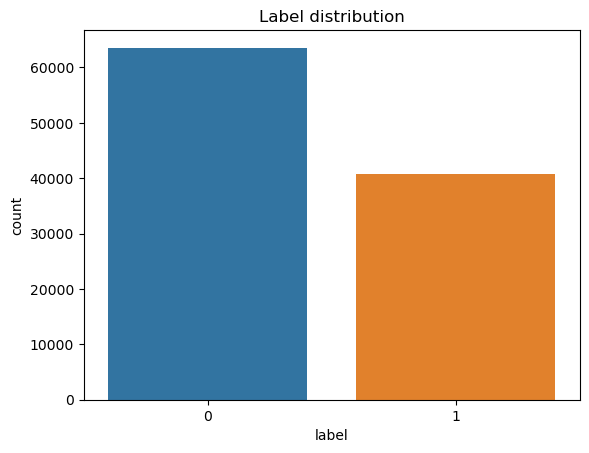

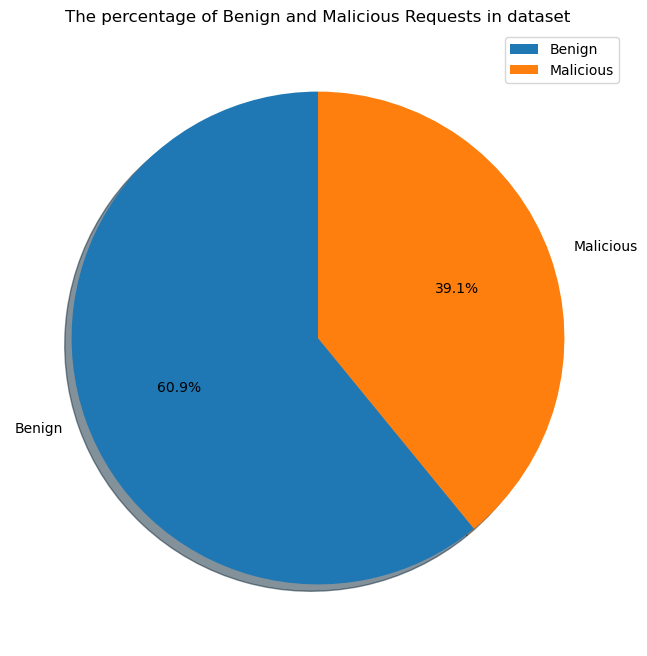

                  dt         switch       pktcount     bytecount  \
count  104345.000000  104345.000000  104345.000000  1.043450e+05   
mean    17927.514169       4.214260   52860.954746  3.818660e+07   
std     11977.642655       1.956327   52023.241460  4.877748e+07   
min      2488.000000       1.000000       0.000000  0.000000e+00   
25%      7098.000000       3.000000     808.000000  7.957600e+04   
50%     11905.000000       4.000000   42828.000000  6.471930e+06   
75%     29952.000000       5.000000   94796.000000  7.620354e+07   
max     42935.000000      10.000000  260006.000000  1.471280e+08   

                 dur      dur_nsec       tot_dur          flows  \
count  104345.000000  1.043450e+05  1.043450e+05  104345.000000   
mean      321.497398  4.613880e+08  3.218865e+11       5.654234   
std       283.518232  2.770019e+08  2.834029e+11       2.950036   
min         0.000000  0.000000e+00  0.000000e+00       2.000000   
25%       127.000000  2.340000e+08  1.270000e+11    

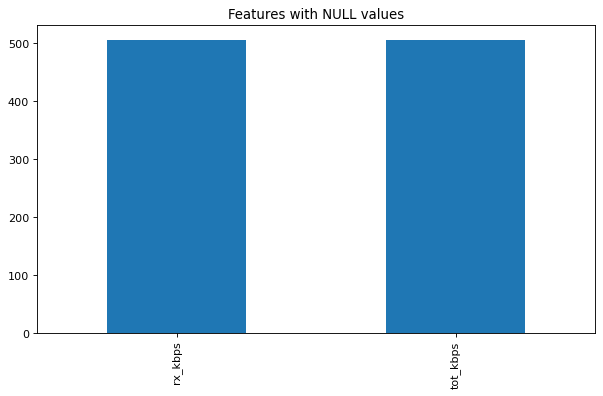

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64
Numeric Columns:  Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns:  Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3
        src       dst Protocol
0  10.0.0.1  10.0.0.8      UDP
1  10.0.0.1  10.0.0.8      UDP
2  10.0.0.2  10.0.0.8      UDP
3

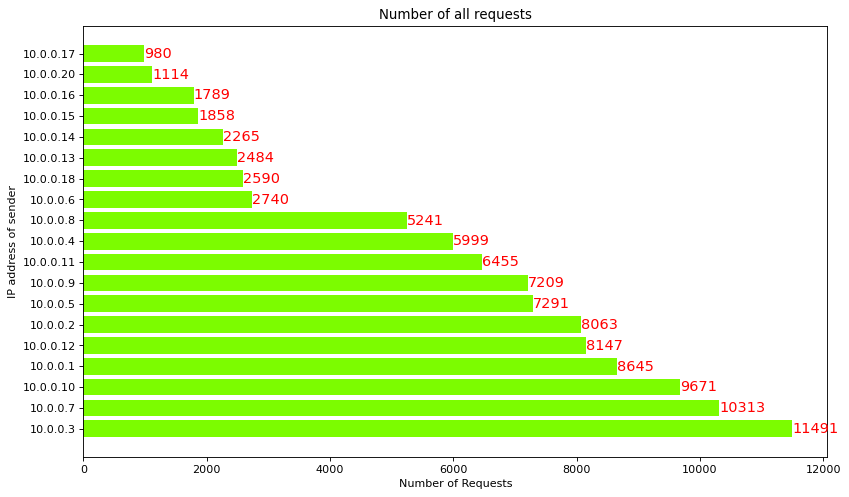

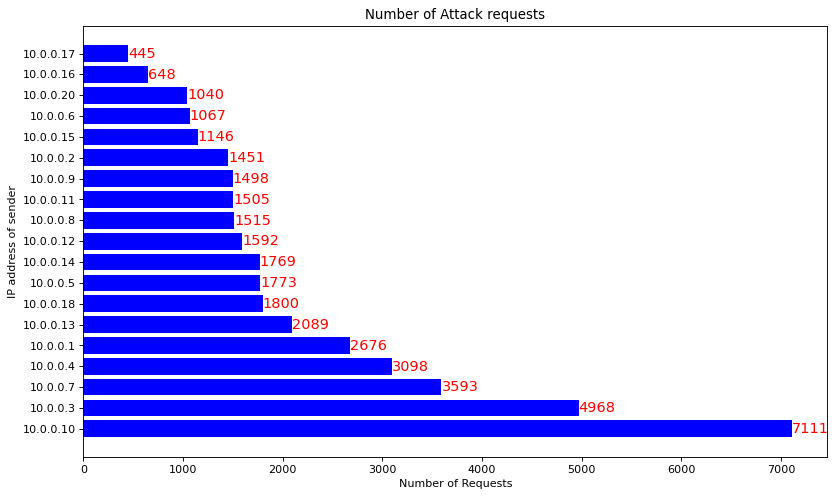

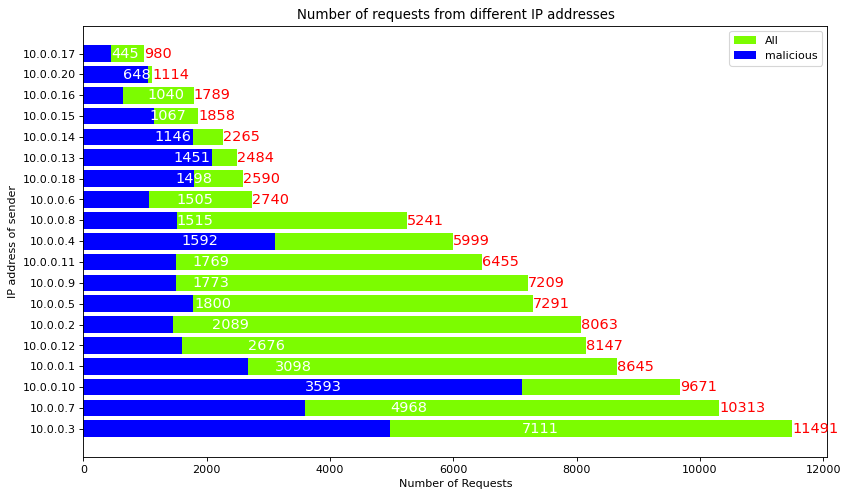

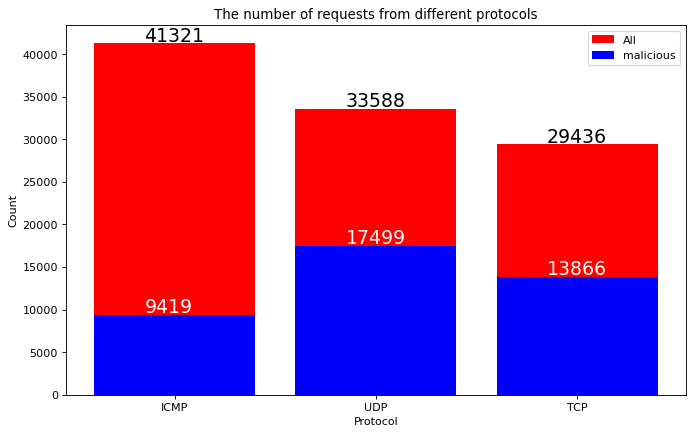

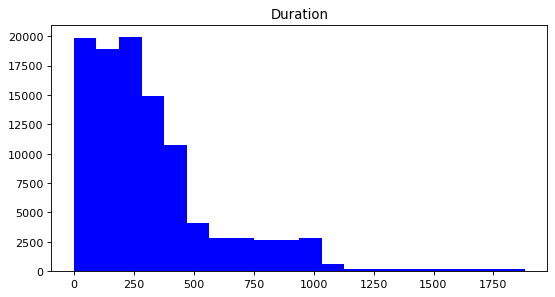

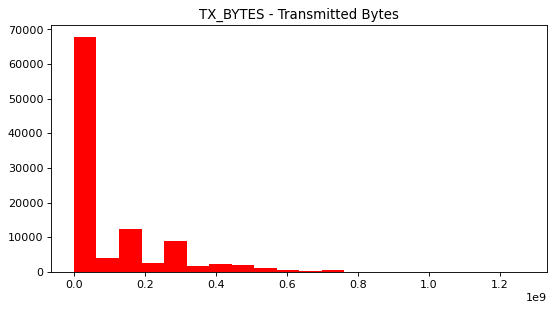

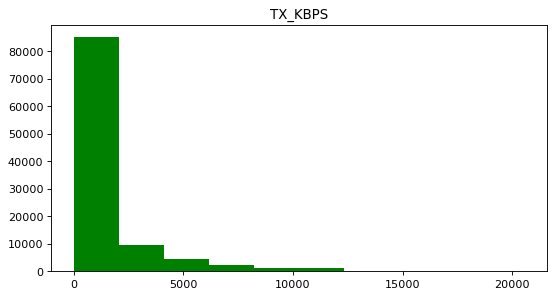

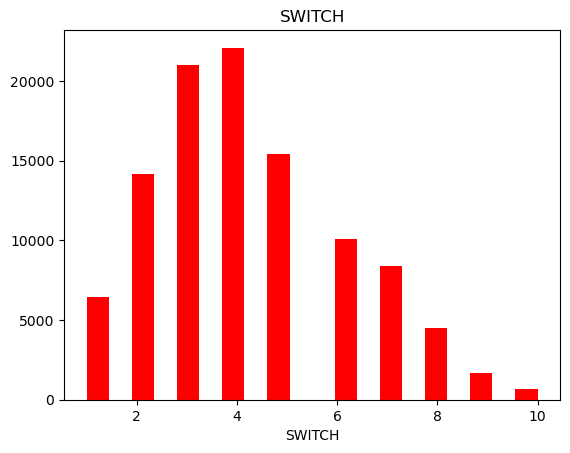

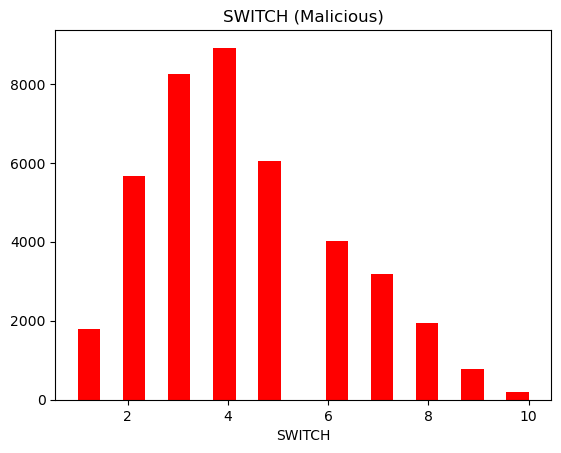

C:\Users\POSEIDON\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 83.84% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     20154
           1       0.75      0.82      0.78     11150

    accuracy                           0.84     31304
   macro avg       0.82      0.83      0.83     31304
weighted avg       0.84      0.84      0.84     31304
 

########################################################################
--- 8.378859519958496 seconds --- time for LogisticRegression
Accuracy: 97.88% 

########################################################################
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19189
           1       0.97      0.98      0.97     12115

    accuracy                           0.98     31304
   macro avg       0.98      0.98

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Load the dataset
data = pd.read_csv('dataset_sdn.csv')

# Data Analysis
print(data.head())
print(data.shape)
print(data.info())

# Check label distribution
label_dict = dict(data.label.value_counts())
print(data.label.unique())
print(data.label.value_counts())

# Plot label distribution
sns.countplot(x=data.label)
plt.title('Label distribution')
plt.show()

# Plot label distribution in pie chart
labels = ["Benign", "Malicious"]
sizes = [label_dict[0], label_dict[1]]
plt.figure(figsize=(13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels)
plt.title('The percentage of Benign and Malicious Requests in dataset')
plt.show()

# Describe dataset
print(data.describe())

# Plot null values
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() > 0]].isna().sum().sort_values().plot.bar()
plt.title("Features with NULL values")
plt.show()

print(data.isnull().sum())

# Identify numeric and object columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns

print('Numeric Columns: ', numeric_cols, '\n')
print('Object Columns: ', object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

print(object_df.head())

# Visualize object columns
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)
plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.title('Number of all requests')
plt.show()

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')
for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)
plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.title('Number of Attack requests')
plt.show()

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')
for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)
for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='w', size=13)
plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.legend(['All', 'malicious'])
plt.title('Number of requests from different IP addresses')
plt.show()

figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')
plt.text(x=0-0.15, y=41321+200, s=str(41321), color='black', size=17)
plt.text(x=1-0.15, y=33588+200, s=str(33588), color='black', size=17)
plt.text(x=2-0.15, y=29436+200, s=str(29436), color='black', size=17)
plt.text(x=0-0.15, y=9419+200, s=str(9419), color='w', size=17)
plt.text(x=1-0.15, y=17499+200, s=str(17499), color='w', size=17)
plt.text(x=2-0.15, y=13866+200, s=str(13866), color='w', size=17)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')
plt.show()

df = data.copy()

# Histograms for numeric features
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPS')
plt.show()

plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH (Malicious)')
plt.xlabel('SWITCH')
plt.show()

# Machine Learning Models
class Model:
    def __init__(self, data):
        self.data = data.drop(columns=['label'])
        self.labels = data['label']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, self.labels, random_state=42, test_size=0.3)
        self.preprocess()
        
    def preprocess(self):
        numeric_features = self.data.select_dtypes(include=['int64', 'float64']).columns
        categorical_features = self.data.select_dtypes(include=['object']).columns
    
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Adding imputer for numeric features
            ('scaler', StandardScaler())
        ])
    
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Adding imputer for categorical features
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
    
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        self.X_train = self.preprocessor.fit_transform(self.X_train)
        self.X_test = self.preprocessor.transform(self.X_test)


    def LogisticRegression(self):
        start_time = time.time()
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            results_lr.append({'solver': solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                               'Coefficients': {'W': LR.coef_, 'b': LR.intercept_}})
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train, self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        
    # def SupportVectorMachine(self):
    #     start_time = time.time()
    #     accuracy_list = []
    #     result_svm = []
    #     kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    #     for kernel in kernels:
    #         SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
    #         predicted_svm = SVM.predict(self.X_test)
    #         accuracy_svm = accuracy_score(self.y_test, predicted_svm)
    #         accuracy_list.append(accuracy_svm)
    #         result_svm.append({'kernel': kernel, 'accuracy': str(round(accuracy_svm * 100, 2)) + "%"})

    #     best_kernel = kernels[accuracy_list.index(max(accuracy_list))]
    #     SVM = svm.SVC(kernel=best_kernel).fit(self.X_train, self.y_train)
    #     predicted_svm = SVM.predict(self.X_test)
    #     accuracy_svm = accuracy_score(self.y_test, predicted_svm)
    #     print("Accuracy: %.2f%%" % (accuracy_svm * 100.0), '\n')
    #     print("########################################################################")
    #     print('Best kernel is : ', best_kernel)
    #     print("########################################################################")
    #     print(classification_report(predicted_svm, self.y_test), '\n')
    #     print("########################################################################")
    #     print("--- %s seconds --- time for SupportVectorMachine" % (time.time() - start_time))
        
    def KNN(self):
        start_time = time.time()
        KNN = KNeighborsClassifier(n_neighbors=7).fit(self.X_train, self.y_train)
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = accuracy_score(self.y_test, predicted_knn)
        print("Accuracy: %.2f%%" % (accuracy_knn * 100.0), '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for KNN" % (time.time() - start_time))
        
    def DecisionTree(self):
        start_time = time.time()
        DT = DecisionTreeClassifier(criterion="entropy", max_depth=5).fit(self.X_train, self.y_train)
        predicted_dt = DT.predict(self.X_test)
        accuracy_dt = accuracy_score(self.y_test, predicted_dt)
        print("Accuracy: %.2f%%" % (accuracy_dt * 100.0), '\n')
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for DecisionTree" % (time.time() - start_time))
        
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(n_estimators=100, max_depth=5).fit(self.X_train, self.y_train)
        predicted_rf = RF.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)
        print("Accuracy: %.2f%%" % (accuracy_rf * 100.0), '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for RandomForest" % (time.time() - start_time))

# Initialize the model
model = Model(data)

# Test the methods
model.LogisticRegression()

model.KNN()
model.DecisionTree()
model.RandomForest()

# model.SupportVectorMachine()
